## Last test at Colab : 2022-04-26

## 한글



*   이론 :  https://wikidocs.net/164365 and https://wikidocs.net/164823  and https://wikidocs.net/164835 
*   구현 : https://wikidocs.net/165034  and https://wikidocs.net/164499 


## English


*   Theory : https://wikidocs.net/165403 and https://wikidocs.net/165405  and https://wikidocs.net/165406 
*   Implementation : https://wikidocs.net/165443  and https://wikidocs.net/165444 





### Libraries such as Convolution, Pooling, and Alternating must be loaded.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import Model, Sequential

### Below part is same with FFN.

11501568/11490434 [==============================] - 0s 0us/step
[5 0 4 1 9 2 1 3 1 4]


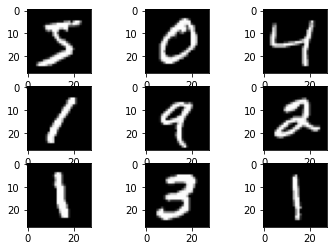

(60000, 28, 28, 1)


In [2]:
import matplotlib.pyplot as plt

# print(tf.__version__)
## MNIST Dataset #########################################################
mnist = tf.keras.datasets.mnist
# class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
# mnist = tf.keras.datasets.fashion_mnist
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()    

# Change data type as float. If it is unt type, it might cause error 
X_train, X_test = X_train / 255.0, X_test / 255.0

print(Y_train[0:10])


# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # if you want to invert color, you can use 'gray_r'. this can be used only for MNIST, Fashion MNIST not cifar10
    # pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray_r'))
    
# show the figure
plt.show()

# in the case of Keras or TF2, type shall be [image_size, image_size, 1]
# if it is RGB type, type shall be [image_size, image_size, 3]
# For MNIST or Fashion MNIST, it need to reshape
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

print(X_train.shape)

Then, all you have to do is specify the Model as follows. The convolution layer only needs to know the kernel size, the number of filrs, activation, and input size. In the code below, compared to the previous FFN, three convolution layers and a pooling layer are added. Then we need the Flattening Layer to connect to the Dense layer.

In [3]:
model = Sequential([
    Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME',input_shape=(28, 28, 1)),
    MaxPool2D(padding='SAME'),
    Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME'),
    MaxPool2D(padding='SAME'),
    Conv2D(filters=256, kernel_size=3, activation=tf.nn.relu, padding='SAME'),
    MaxPool2D(padding='SAME'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

### Below part is same with FFN.

In [4]:
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5, verbose=1)

model.evaluate(X_test,  Y_test, verbose=2)              

"""
verbose default is 1

verbose=0 (silent)

verbose=1 (progress bar)

Train on 186219 samples, validate on 20691 samples
Epoch 1/2
186219/186219 [==============================] - 85s 455us/step - loss: 0.5815 - acc: 
0.7728 - val_loss: 0.4917 - val_acc: 0.8029
Train on 186219 samples, validate on 20691 samples
Epoch 2/2
186219/186219 [==============================] - 84s 451us/step - loss: 0.4921 - acc: 
0.8071 - val_loss: 0.4617 - val_acc: 0.8168


verbose=2 (one line per epoch)

Train on 186219 samples, validate on 20691 samples
Epoch 1/1
 - 88s - loss: 0.5746 - acc: 0.7753 - val_loss: 0.4816 - val_acc: 0.8075
Train on 186219 samples, validate on 20691 samples
Epoch 1/1
 - 88s - loss: 0.4880 - acc: 0.8076 - val_loss: 0.5199 - val_acc: 0.8046
 
 """

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

'\nverbose default is 1\n\nverbose=0 (silent)\n\nverbose=1 (progress bar)\n\nTrain on 186219 samples, validate on 20691 samples\nEpoch 1/2\n186219/186219 [==============================] - 85s 455us/step - loss: 0.5815 - acc: \n0.7728 - val_loss: 0.4917 - val_acc: 0.8029\nTrain on 186219 samples, validate on 20691 samples\nEpoch 2/2\n186219/186219 [==============================] - 84s 451us/step - loss: 0.4921 - acc: \n0.8071 - val_loss: 0.4617 - val_acc: 0.8168\n\n\nverbose=2 (one line per epoch)\n\nTrain on 186219 samples, validate on 20691 samples\nEpoch 1/1\n - 88s - loss: 0.5746 - acc: 0.7753 - val_loss: 0.4816 - val_acc: 0.8075\nTrain on 186219 samples, validate on 20691 samples\nEpoch 1/1\n - 88s - loss: 0.4880 - acc: 0.8076 - val_loss: 0.5199 - val_acc: 0.8046\n \n '